# Unit 5 - Financial Planning


In [14]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [15]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [16]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [17]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/bitcoin/?converty=USD"
eth_url = "https://api.alternative.me/v2/ticker/ethereum/?converty=USD"

In [18]:
# Fetch current BTC price
response_btc = requests.get(btc_url)
btc_data = response_btc.json()
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
response_eth = requests.get(eth_url)
eth_data = response_eth.json()
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $71263.20
The current value of your 5.3 ETH is $12180.62


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [19]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [20]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [21]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-04-16", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open     high    low   close   volume    open   
time                                                                         
2021-04-16 00:00:00-04:00  114.56  114.665  114.5  114.54  3488514  417.25   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-16 00:00:00-04:00  417.91  415.73  417.31  66624780

In [22]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.54
Current SPY closing price: $417.31


In [23]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20865.50
The current value of your 200 AGG shares is $22908.00


### Savings Health Analysis

In [24]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value

savings_dict = {
    "amount": [total_crypto, total_shares]
}

df_savings = pd.DataFrame(savings_dict, index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,83443.819
shares,43773.500


<AxesSubplot:title={'center':'Compostion of Personal Savings'}, ylabel='amount'>

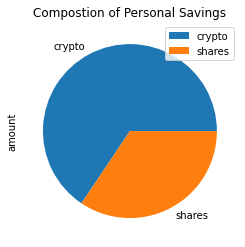

In [25]:
# Plot savings pie chart
df_savings.plot(kind="pie", y="amount", title="Compostion of Personal Savings")

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached this financial goal of having enough savings in your emergency fund.")
elif total_savings < emergency_fund:
    remaining = emergency_fund - total_savings
    print(f"You are ${remaining} away from reaching the goal of havings enough savings in your emergency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date_2016_2018 = pd.Timestamp('2016-04-16', tz='America/New_York').isoformat()
end_date_2016_2018 = pd.Timestamp('2018-04-15', tz='America/New_York').isoformat()
start_date_2018_2021 = pd.Timestamp('2018-04-16', tz='America/New_York').isoformat()
end_date_2018_2021 = pd.Timestamp('2021-04-16', tz='America/New_York').isoformat()

In [37]:
# Get 5 years' worth of historical data for SPY and AGG
# Since Alpaca is limited to only 1000 days of data per API call, we have to split the call into a 2 year and a 3 year segments,
# and then concat the data together
df_stock_data_2016_2018 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date_2016_2018,
    end = end_date_2016_2018,
    limit = 1000
).df

df_stock_data_2018_2021 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date_2018_2021,
    end = end_date_2018_2021,
    limit = 1000
).df

df_stock_data = pd.concat([df_stock_data_2016_2018, df_stock_data_2018_2021], axis=0)

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high      low   close     volume    open   
time                                                                            
2016-04-18 00:00:00-04:00  110.91  110.95  110.790  110.94  1969864.0  207.13   
2016-04-19 00:00:00-04:00  110.94  111.00  110.770  110.92  1809082.0  209.74   
2016-04-20 00:00:00-04:00  111.02  111.03  110.604  110.67  2196220.0  209.95   
2016-04-21 00:00:00-04:00  110.52  110.62  110.450  110.51  2431934.0  210.12   
2016-04-22 00:00:00-04:00  110.65  110.72  110.520  110.54  2384801.0  208.56   

                                                             
                             high     low   close    volume  
time                                                         
2016-04-18 00:00:00-04:00  209.28  207.00  209.28  57240308  
2016-04-19 00:00:00-04:00  210.20  208.94  209.87  67063226  
2016-04-20 00:00:00-04:00  210.92  209.39  210.06  55699861  
2016-04-21 00:00:00-04:00  210.25  208.65  208.96  58074832  
2016-04-22 00:00:00-04:00  209.29  207.91  208.99  65504515

In [38]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data=df_stock_data,
    weights = [0.4,0.6],
    num_simulation=500,
    num_trading_days=30*252
)

In [39]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                      \
                             open    high      low   close     volume   
time                                                                    
2016-04-18 00:00:00-04:00  110.91  110.95  110.790  110.94  1969864.0   
2016-04-19 00:00:00-04:00  110.94  111.00  110.770  110.92  1809082.0   
2016-04-20 00:00:00-04:00  111.02  111.03  110.604  110.67  2196220.0   
2016-04-21 00:00:00-04:00  110.52  110.62  110.450  110.51  2431934.0   
2016-04-22 00:00:00-04:00  110.65  110.72  110.520  110.54  2384801.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-04-18 00:00:00-04:00          NaN  207.13  209.28  207.00  209.28   
2016-04-19 00:00:00-04:00    -0.000180  209.74  210.20  208.94  209.87   
2016-04-20 00:00:00-04:00    -0.002254  209.95  210.92  209.39  210.06   
2016-04-21 00:00:00-04:00    -0.001446  210.12  210.25  208.65  208.96   
2016-04-22 00:00:00-04:00     0.000271  208.56  209.29  207.91  208.99   

                                                  
                             volume daily_return  
time                                              
2016-04-18 00:00:00-04:00  57240308          NaN  
2016-04-19 00:00:00-04:00  67063226     0.002819  
2016-04-20 00:00:00-04:00  55699861     0.000905  
2016-04-21 00:00:00-04:00  58074832    -0.005237  
2016-04-22 00:00:00-04:00  65504515     0.000144

In [40]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003325,1.009090,1.004838,0.991401,0.994705,0.987406,1.002708,0.992285,1.008278,1.004963,...,1.007077,1.001327,0.988274,0.995328,1.010607,1.001214,0.994503,0.999464,0.996929,0.997176
2,1.008898,1.003468,1.007163,0.988753,0.994627,0.996116,1.013488,0.976528,0.998947,1.000213,...,1.010372,0.987491,0.984570,0.986027,1.006852,1.000607,0.991959,0.993339,0.981750,1.001446
3,1.023142,0.996922,1.009331,0.987201,0.994769,0.986483,1.014709,0.978118,1.001081,1.005373,...,1.017207,0.989996,0.991451,0.984193,1.018381,0.999587,0.994345,0.993816,0.979116,1.008515
4,1.021484,0.992925,1.019081,0.985276,0.998717,0.987682,1.009087,0.979016,1.006714,1.014821,...,1.021966,0.988058,0.998777,0.981292,1.020119,1.019663,0.999802,0.996283,0.983536,1.003495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.401858,15.067666,10.780309,9.076751,8.807782,21.846259,11.967728,16.364111,10.647417,13.530449,...,12.620631,35.406472,15.663440,28.079601,3.657209,14.539241,23.260884,16.027601,11.825895,13.007606
7557,11.361813,15.218237,10.696768,9.152660,8.801744,22.118147,12.035309,16.548646,10.728999,13.692272,...,12.543208,35.827345,15.669860,27.759679,3.685418,14.306412,23.101357,16.131976,11.838761,12.906129
7558,11.311273,15.075767,10.655062,9.106296,8.792706,22.168921,12.010669,16.426013,10.816575,13.666489,...,12.512588,36.032398,15.421936,27.323650,3.722080,14.373145,22.867032,15.994603,11.799117,12.905881
7559,11.451374,14.984732,10.641343,9.069189,8.867535,22.030181,11.993934,16.533948,10.923230,13.796890,...,12.550577,36.076607,15.386194,27.521111,3.742877,14.407778,22.931916,15.936423,11.780576,12.906868


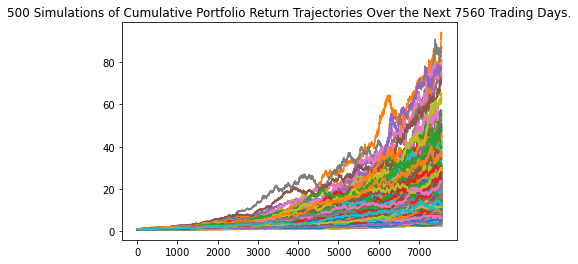

In [41]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

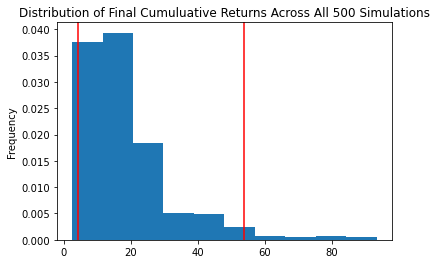

In [42]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
return_stats = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
return_stats

count           500.000000
mean             18.354319
std              13.409598
min               2.446311
25%               9.793500
50%              14.990182
75%              22.657612
max              93.408325
95% CI Lower      4.148727
95% CI Upper     53.652041
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [44]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(return_stats[-2]*initial_investment,2)
ci_upper = round(return_stats[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $82974.55 and $1073040.82


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [45]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(return_stats[-2]*initial_investment,2)
ci_upper = round(return_stats[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $124461.82 and $1609561.23


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [46]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data=df_stock_data,
    weights = [0.4,0.6],
    num_simulation=500,
    num_trading_days=5*252
)

In [47]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991573,1.008017,1.013992,0.985667,1.002331,0.998794,0.999948,1.000835,0.987550,1.007284,...,1.002206,1.005082,0.996492,0.990060,1.005746,1.010596,0.991082,1.003065,1.011888,0.995296
2,0.982712,1.007096,1.019812,0.988246,1.006654,1.010760,0.999045,1.010748,0.997566,1.010823,...,0.998908,1.003939,1.003224,0.998739,1.007382,1.020328,0.997243,0.993075,1.022710,0.999514
3,0.974442,1.004469,1.009923,0.981156,1.000190,0.990418,0.999894,1.007178,1.007639,1.009588,...,0.992109,1.018562,1.005800,1.005501,1.007455,1.008905,1.006195,1.000383,1.036911,1.004502
4,0.980690,1.003920,1.010406,0.975710,1.003390,0.986166,1.009433,1.015876,1.011695,1.016738,...,0.996079,1.013765,0.997952,1.007249,1.021577,1.005624,0.988652,1.014653,1.022157,1.000197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.388878,1.297704,1.464610,1.940204,1.255418,1.178505,1.510174,1.736615,1.640773,1.715963,...,1.612870,0.958609,2.029886,1.261591,1.179978,1.570592,1.397084,2.163014,1.311340,1.551271
1257,1.407171,1.288846,1.452442,1.934078,1.271455,1.173270,1.502708,1.745126,1.641396,1.722111,...,1.609223,0.965849,2.029094,1.257912,1.183251,1.554482,1.397152,2.132881,1.302805,1.549935
1258,1.413796,1.291512,1.447968,1.908534,1.265928,1.171935,1.512595,1.734838,1.653308,1.741157,...,1.616965,0.964375,2.038208,1.250757,1.193977,1.544568,1.389980,2.134399,1.288350,1.553713
1259,1.417745,1.289367,1.441553,1.892363,1.259460,1.167451,1.514093,1.737355,1.645487,1.734226,...,1.597458,0.959993,2.051987,1.272320,1.187437,1.536782,1.377161,2.154438,1.278669,1.536192


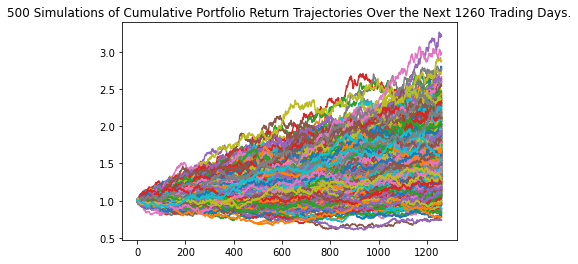

In [48]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

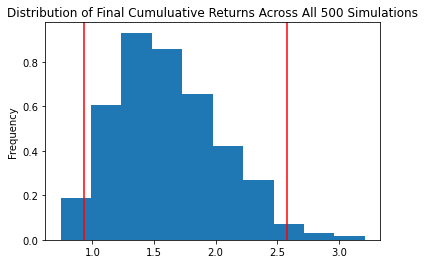

In [49]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
return_stats_5yr = MC_five_year.summarize_cumulative_return()

# Print summary statistics
return_stats_5yr

count           500.000000
mean              1.617273
std               0.430282
min               0.740623
25%               1.289318
50%               1.574753
75%               1.907596
max               3.210690
95% CI Lower      0.933998
95% CI Upper      2.582147
Name: 1260, dtype: float64

In [51]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(return_stats_5yr[-2]*initial_investment,2)
ci_upper_five = round(return_stats_5yr[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56039.87 and $154928.83


### Ten Years Retirement Option

In [52]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data=df_stock_data,
    weights = [0.4,0.6],
    num_simulation=500,
    num_trading_days=10*252
)

In [53]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015353,1.014133,0.998610,1.000624,0.996636,1.000801,1.000189,0.991261,0.994632,0.999287,...,0.996361,1.003322,0.990269,1.001321,0.992497,1.010508,1.010853,0.988029,1.008159,1.006105
2,0.999974,1.021240,1.000641,1.002951,1.002337,1.001388,0.997985,0.992203,1.002466,0.999668,...,0.983571,0.998065,0.992811,1.000905,1.001375,0.987920,1.023662,0.999512,1.014280,0.996051
3,0.997195,1.021949,0.996991,0.996613,1.006733,0.995136,0.993834,0.999625,1.002790,1.007427,...,0.980851,1.005549,0.980960,1.000293,1.010597,0.989720,1.021761,1.007598,1.030545,0.988263
4,0.997616,1.017591,0.996910,1.000481,1.003468,1.007802,0.987108,1.000304,1.007799,1.008248,...,0.983510,1.014705,0.987042,1.002046,1.015222,0.989515,1.031311,1.009795,1.031326,0.979866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.608124,1.447561,2.650863,2.299689,2.065436,1.940334,2.530514,1.967685,1.766518,2.464399,...,4.371436,6.330417,3.623030,3.338021,2.589206,1.828450,2.493752,2.053608,2.155475,3.125791
2517,2.637945,1.455388,2.671627,2.327793,2.056115,1.950456,2.542698,1.976210,1.730058,2.460987,...,4.394063,6.271541,3.609213,3.334486,2.600604,1.845059,2.473387,2.052163,2.174775,3.199604
2518,2.640157,1.463945,2.638679,2.360742,2.064141,1.933728,2.542611,1.972667,1.726960,2.471986,...,4.387674,6.321002,3.561908,3.349118,2.601063,1.827346,2.474855,2.060746,2.215073,3.211295
2519,2.620490,1.486362,2.663856,2.369399,2.057977,1.927582,2.563586,1.977739,1.716406,2.508067,...,4.399309,6.334158,3.581023,3.382506,2.614532,1.830698,2.477018,2.065762,2.195284,3.230638


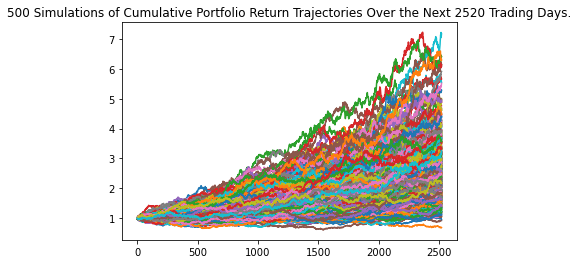

In [54]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

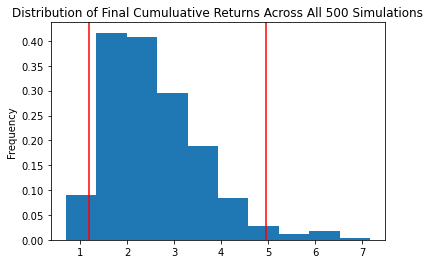

In [55]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
return_stats_10yr = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
return_stats_10yr

count           500.000000
mean              2.581501
std               1.013555
min               0.690740
25%               1.847423
50%               2.381305
75%               3.170384
max               7.172683
95% CI Lower      1.194084
95% CI Upper      4.955142
Name: 2520, dtype: float64

In [58]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(return_stats_10yr[-2]*initial_investment,2)
ci_upper_ten = round(return_stats_10yr[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71645.07 and $297308.52
